## <center> Prova [01] - Inteligência Artificial / UFPB - 2021.2 </center>
**Discente:** Lucas Gomes Dantas <br>
**Matrícula:** 20200082925 <br>
**Dataset:** https://

***


**1 - (1 pt.)** Para cada um dos agentes a seguir, desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um. <br>

> [A] Agente comentarista de jogo - League of Legends. <br> <br>
> [A] Agente sugestor de vinho. <br> <br>
> [C] Agente treinador de time - Basquete.


|Agente| Medida de Desempenho | Ambiente | Atuadores | Sensores |
| :- | :- | :- | :- | :- |
| [A] | Ações geradas pelos jogadores com seus respectivos champs (campeões, personagens), pontuação correta, minimizar tempo de geração de relatório (comentário).  | Engine/platarforma que suporta o game, mapa, campeões (personagens). | Exibir dados de desempenho, diagnóstico de comportamento durante e pós partida,  indicação de bons comportamentos ao finalizar a sessão. | Entrada de dados pela própria engine (tempo de execução de uma habilidade, tempo de recarga de habilidade), percepção de pixels e entrada de ações geradas pelo teclado dos jogadores durante a sessão. |
| [B] | Atende as características que o consumidor assume como um bom vinho. | Bares, adegas, restaurantes, pessoas. | Apresenta as categorias dos vinhos, seus tipos, aromas, precificação e datação. | Entrada através do teclado, tela (terminal visual), descobertas e respostas de apreciadores de vinho (dados e especificações características). |
| [C] | Incrementa o desempenho dos jogadores em partidas, gera profusão nos resultados das partidas. | Time de basquete, ambiente de treinamento, jogadores. | Apresentar dados físicos individuais por jogador, aferir velocidade, altura do salto, sugestões de treinamento individual e em time, correções de comportamento durante os tempos. | Sensor visual (câmera); sensor de batimento cardíaco, oxigênio e água; entrada pelo teclado para informações físicas, respostas dos jogadores. |

**2 - (2 pts.)** Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base. 

|Aprendizado de Máquina||
| :- | :- |
| Supervisionado | #### |
| Não-supervisonado | #### |
| Semi-supervisionado | #### |
| Reforço | #### |


**3 - (5 pts.)** Em um Jupyter Notebook (link do collab, GitHub ou arquivo), utilize o método K vizinhos mais próximos na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação:

> **[*] Ambiente e Dependências**

> **[#] Dataset**

> **[#] Pré-processamento**

> **[#] Funções auxiliares**

***

> **[3.1]** Aplique processos de pré-processamento e os necessários para execução do método K-NN. 

> **[3.2]** Aplique correlação ou PCA e selecione um número menor de atributos com esses métodos e justifique sua decisão. 

> **[3.3]** Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados. 

> **[3.4]** Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados. 

> **[3.5]** Melhor K e melhor distância e testar com o conjunto de atributos do item 2.

**4 - (2 pts)** Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?

|| CLASSE VERDADEIRA | C. V. | C. V. | C. V. | C. V. |  |
| :- | :- | :- | :- | :- | :- | :- |
| | *CLASSES* | Maçã | Laranja | Limão | Manga | Total |
| | | | | | |
| **CLASSE PREDITA** | Maçã | 70 | 20 | 5 | 5 | 100 | 
| C. P. | Laranja | 10 | 67 | 3 | 20 | 100
| C. P. | Limão | 5 | 30 | 55 | 10 | 100 |
| C. P. | Manga | 5 | 4 | 2 | 1.000 | 1.011 |
| |
| | Total | 90 | 121 | 65 | 1.035 | 2.622 |

> **[*] Ambiente e Dependências**

In [8]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from scipy.integrate import simps, trapz

> **[#] Funções auxiliares**

In [2]:
def sensibilidade(fruta: dict[str, int]): ## Sensibilidade - VP / (VP + FN)
  return fruta["vp"] / (fruta["vp"] + fruta["fn"])

def especificidade(fruta: dict[str, int]): ## Especificidade - VN / (VN + FP)
  return fruta["vn"] / (fruta["vn"] + fruta["fp"])

def precisao(fruta: dict[str, int]): ## Precisão - VP / (VP + FP)
  return fruta["vp"] / (fruta["vp"] + fruta["fp"])

def f1(precisao, sensibilidade): ## F1 = (2 * Precisão * Sensibilidade) / (Precisão + Sensibilidade)
  return (2 * precisao * sensibilidade) / (precisao + sensibilidade)

def acuracia(fruta: dict[str, int]): ## Acurácia = (VN + VP) / (VP + FN + VN + FP)
  return (fruta["vn"] + fruta["vp"]) / (fruta["vp"] + fruta["fn"] + fruta["vn"] + fruta["fp"])   

def phi(fruta: dict[str, int]):  ## Coeficiente de Correlação de Matthews (phi) = (VP * VN – FP * FN) / sqrt((VP + FP) * (VP + FN) * (VN + FP) * (VN + FN))
  return (((fruta["vp"] * fruta["vn"]) - (fruta["fp"] + fruta["fn"])) / math.sqrt((fruta["vp"] + fruta["fp"]) * (fruta["vp"] + fruta["fn"]) * (fruta["vn"] + fruta["fp"]) * (fruta["vn"] + fruta["fn"])))

def tpr(fruta: dict[str, int]): ## True Positive Rate - Taxa de Verdadeiro Positivo = (VP / (VP + FN))
  return fruta["vp"] / (fruta["vp"] + fruta["fn"])

def fpr(fruta: dict[str, int]): ## False Positive Rate - Taxa de Falso Positivo = (FP / (VN + FP))
  return fruta["fp"] / (fruta["vn"] + fruta["fp"])

> **[#] Convertendo Planilha** 

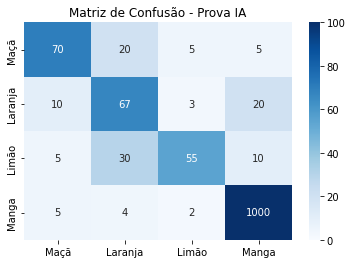

In [3]:
conf_arr = np.array([[70, 20, 5, 5], [10, 67, 3, 20], [5, 30, 55, 10], [5, 4, 2, 1000]])
sum = conf_arr.sum()

df_cm = pd.DataFrame(conf_arr, index = ['Maçã', 'Laranja', 'Limão', 'Manga'], columns = ['Maçã', 'Laranja', 'Limão', 'Manga'])

res = sn.heatmap(df_cm, annot = True, vmin = 0.0, vmax = 100.0, cmap = plt.cm.Blues, fmt = 'g')

plt.yticks([0.5, 1.5, 2.5, 3.5], ['Maçã', 'Laranja', 'Limão', 'Manga'], va = 'center')
plt.title('Matriz de Confusão - Prova IA')
plt.show()

> **[#] Dados** 

In [4]:
# Frutas
maca = {"vp":70, "fp":(20 + 5 + 5), "fn":(10 + 5 + 5), "vn":(67 + 55 + 1000)}
laranja = {"vp":67, "fp":(10 + 3 + 20), "fn":(20 + 30 + 4), "vn":(70 + 55 + 1000)}
limao = {"vp":55, "fp":(5 + 30 + 10), "fn":(5 + 3 + 2), "vn":(70 + 67 + 1000)}
manga = {"vp":1000, "fp":(5 + 4 + 2), "fn":(5 + 20 + 10 ), "vn":(70 + 67 + 55)}

In [5]:
# Métricas
sensibilidade = (sensibilidade(maca) + sensibilidade(laranja) + sensibilidade(limao) + sensibilidade(manga)) / 4
especificidade = (especificidade(maca) + especificidade(laranja) + especificidade(limao) + especificidade(manga)) / 4
precisao = (precisao(maca) + precisao(laranja) + precisao(limao) + precisao(manga)) / 4 
f1 = f1(precisao, sensibilidade)
acuracia = (acuracia(maca) + acuracia(laranja) + acuracia(limao) + acuracia(manga)) / 4 
phi = (phi(maca) + phi(laranja) + phi(limao) + phi(manga)) / 4 

# ROC - AUC
tpr = (tpr(maca) + tpr(laranja) + tpr(limao) + tpr(manga)) / 4 
fpr = (fpr(maca) + fpr(laranja) + fpr(limao) + fpr(manga)) / 4 

> **[#] Métricas - Matriz de Confusão** 

In [29]:
print(f'Sensibilidade = {sensibilidade:.2f}')
print(f'Especificidade = {especificidade:.2f}')
print(f'Precisão = {precisao:.2f}')
print(f'Medida F1 = {f1:.2f}')
print(f'Acurácia = {acuracia:.2f}')
print(f'Coeficiente de Matthews = {phi:.2f}')

Sensibilidade = 0.79
Especificidade = 0.96
Precisão = 0.73
Medida F1 = 0.76
Acurácia = 0.95
Coeficiente de Matthews = 0.71


> **[*] AUC**

In [7]:
print(f'Taxa de verdadeiro positivo = {tpr:.2f}')
print(f'Taxa de falso positivo = {fpr:.2f}')

Taxa de verdadeiro positivo = 0.79
Taxa de falso positivo = 0.04


In [28]:
x = (0, tpr, 1)
y = (0, fpr, 1)

auc = trapz(x, y)

print(f'Area Under The Curve - AUC = {auc:.2f}')

Area Under a Curve - AUC = 0.87


> **[*] Como você resolveria o problema dessa base de dados observando as métricas de avaliação?**

###################

**5* - (Extra ++)** Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.

***

In [21]:
#!pip3 install math
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install seaborn
#!pip3 install statistics 
#!pip3 install sklearn